# II. Programming
Done by David Quintino (107095) and Joana Vaz (106078)


# Exercise 1

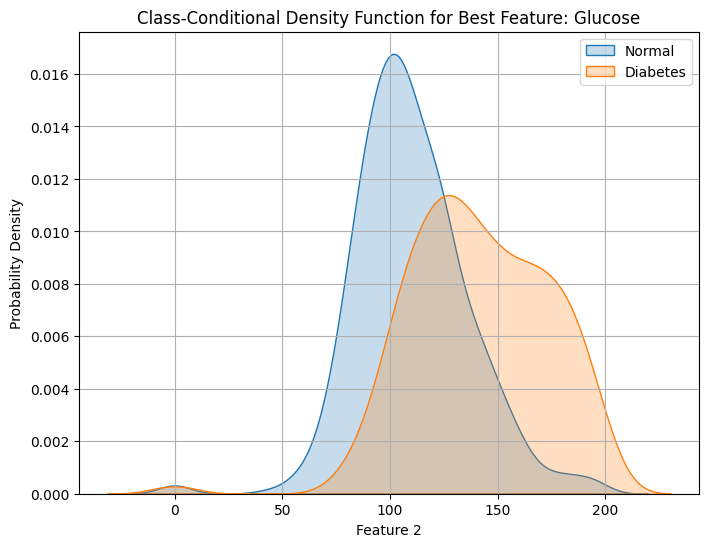

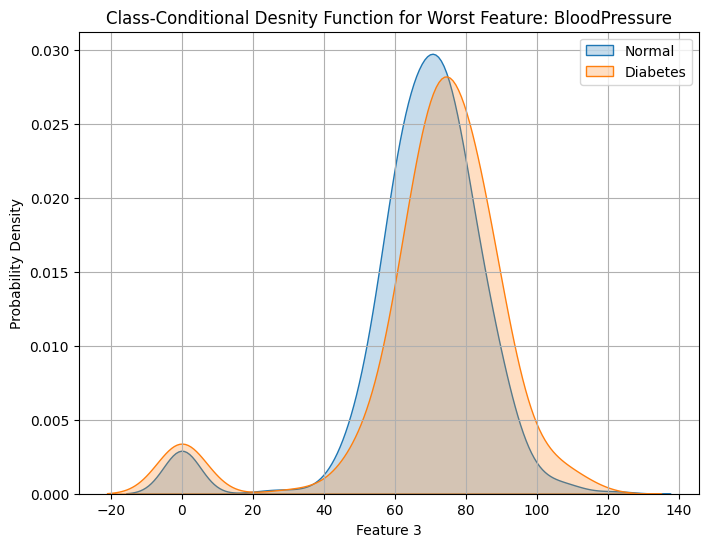

The Feature with the best disccriminite power is Glucose and the one with the worst is BloodPressure


In [ ]:
# Required imports
import numpy as np
import pandas as pd
from scipy.io import arff  # To load .arff files
from sklearn.feature_selection import f_classif
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data file
data, meta = arff.loadarff('diabetes.arff')

#Convert the loaded .arff data into a pandas DataFrame
df = pd.DataFrame(data)

X = df.iloc[:, :-1]  # Biological features
y = df.iloc[:, -1]   # Target labels (class)

#Perform the ANOVA test
F_values, p_values = f_classif(X, y)

# Identify the features with the best and worst discriminative power
best_feature_idx = np.argmax(F_values)
worst_feature_idx = np.argmin(F_values)
feature_names = X.columns

# Function to plot class-conditional Density Function for the best and worst features
def plot_class_conditional_densityfunc(X, y, feature_idx, title):
    feature_data = X.iloc[:, feature_idx]
    plt.figure(figsize=(8, 6))
    sns.kdeplot(feature_data[y == np.unique(y)[0]], label=f'Normal', fill = True)
    sns.kdeplot(feature_data[y == np.unique(y)[1]], label=f'Diabetes', fill = True)
    plt.title(title)
    plt.xlabel(f'Feature {feature_idx + 1}')
    plt.ylabel('Probability Density')
    plt.legend()
    plt.grid()
    plt.show()


# Plot the class-conditional Density Function for the best and worst features
print(f"The Feature with the best disccriminite power is {feature_names[best_feature_idx]} and the one with the worst is {feature_names[worst_feature_idx]}")
plot_class_conditional_densityfunc(X, y, best_feature_idx, title=f'Class-Conditional Density Function for Best Feature: {feature_names[best_feature_idx]}')
plot_class_conditional_densityfunc(X, y, worst_feature_idx, title=f'Class-Conditional Desnity Function for Worst Feature: {feature_names[worst_feature_idx]}')




# Exercise 2


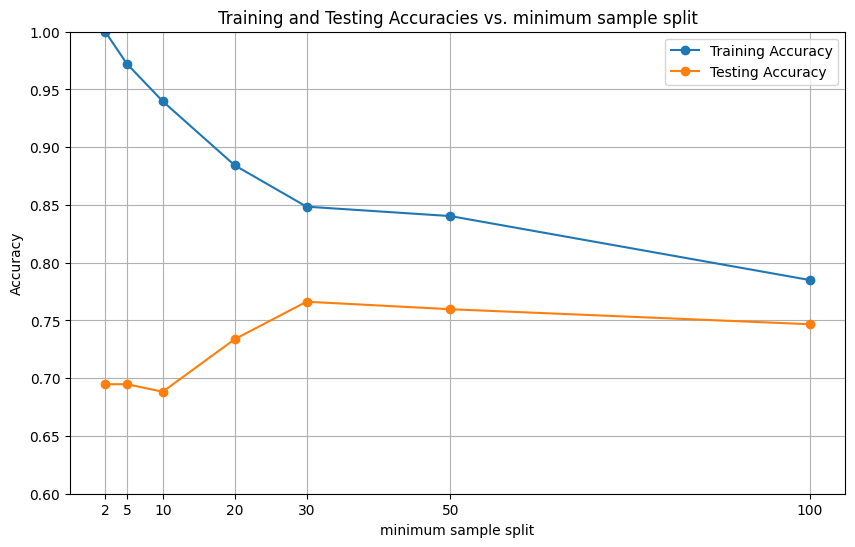

In [ ]:
import pandas as pd
import numpy as np
from scipy.io import arff
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

# Load the .arff dataset
data, meta = arff.loadarff('diabetes.arff')
df = pd.DataFrame(data)

# Preprocess the DataFrame (convert byte strings to normal strings)
df['Outcome'] = df['Outcome'].str.decode('utf-8').astype(int)

# Define features and target
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Stratified train-test split with seed
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=1)

# Define the min_samples_split values to evaluate
min_samples_split_values = [2, 5, 10, 20, 30, 50, 100]

# Initialize lists to store accuracies
train_accuracies = []
test_accuracies = []

# Number of runs for averaging
n_runs = 10

for min_samples_split in min_samples_split_values:
    aux_train_acc = []
    aux_test_acc = []
    for _ in range(n_runs):
        # Create and fit the model
        decision_tree = DecisionTreeClassifier(min_samples_split=min_samples_split, random_state=1)
        decision_tree.fit(X_train, y_train)

        # Calculate accuracies
        aux_train_acc.append(decision_tree.score(X_train, y_train))
        aux_test_acc.append(decision_tree.score(X_test, y_test))

    # Average accuracies for this min_samples_split value
    train_accuracies.append(np.mean(aux_train_acc))
    test_accuracies.append(np.mean(aux_test_acc))

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(min_samples_split_values, train_accuracies, label='Training Accuracy', marker='o')
plt.plot(min_samples_split_values, test_accuracies, label='Testing Accuracy', marker='o')
plt.title('Training and Testing Accuracies vs. minimum sample split')
plt.xlabel('minimum sample split')
plt.ylabel('Accuracy')
plt.xticks(min_samples_split_values)
plt.ylim(0.60 , 1)  # Set y-axis limits from 0 to 1
plt.legend()
plt.grid()
plt.show()

# Exercise 3


Overall, the model exhibits poor performance on the testing data while performing well on the training data. In the beginning, the training and testing accuracy curves are quite far apart, indicating that the model is not generalizing well. As the minimum sample split increases, particularly around a value of 20, we observe that the testing accuracy begins to improve, and the gap between the training and testing accuracy narrows significantly.

This suggests that the model is starting to generalize better as we increase the minimum sample split, moving away from overfitting.
However, if we continue to increase the minimum sample split beyond a certain point, we start to see a decline in both training and testing accuracy, indicating potential underfitting.

# Exercise 4

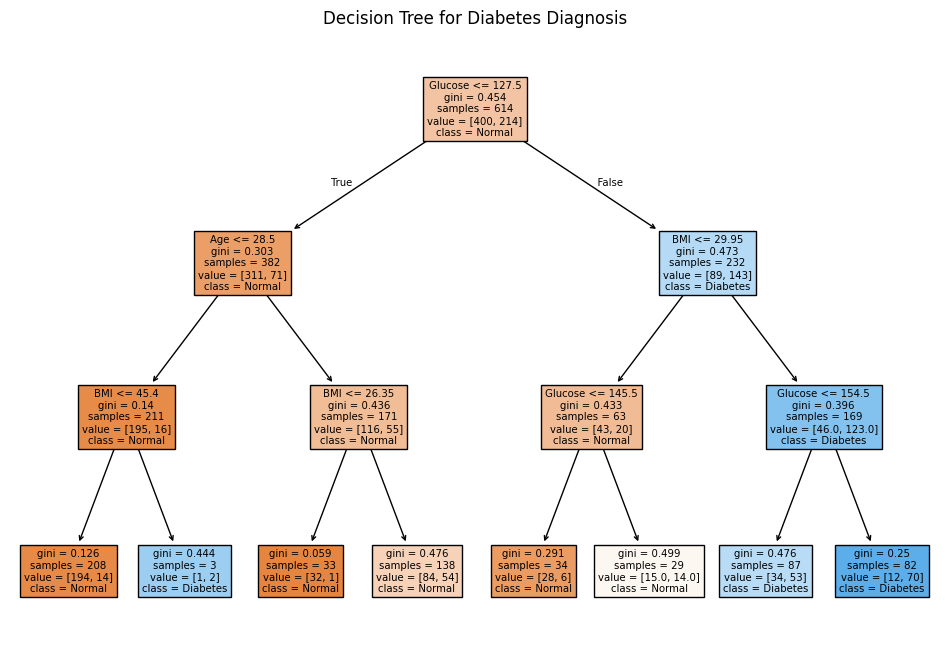

In [41]:
import pandas as pd
import numpy as np
from scipy.io import arff
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Load the .arff dataset
data, meta = arff.loadarff('diabetes.arff')
df = pd.DataFrame(data)

# Preprocess the DataFrame (convert byte strings to normal strings)
df['Outcome'] = df['Outcome'].str.decode('utf-8').astype(int)

# Define features and target
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Stratified train-test split with seed
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=1)

# Create and fit the decision tree model
decision_tree = DecisionTreeClassifier(max_depth=3, random_state=1)
decision_tree.fit(X_train, y_train)

# Plot the decision tree
plt.figure(figsize=(12, 8))
plot_tree(decision_tree, feature_names=X.columns, class_names=['Normal', 'Diabetes'], filled=True)
plt.title("Decision Tree for Diabetes Diagnosis")
plt.show()